**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>



<div class="alert alert-info" role="alert">
Dear Reviewer, 
    
<br>Thank you for reviewing my work. 

<br>RMSE ranges between 0 and positive infinity, and a model is considered to a good performer when it scores as close as possible to 0. No matter which algorithm I chose, the RMSE score was off by whopping 1750 EUR. The different ways of feature engineering I tried did not help either. I would appreciate good tips on how to improve. 
   
<br>Please note that the CatBoost version on the Hub is 0.20.2, and you are kindly requested to upgrade it to version 1.0.3. I am using select_features methods in this project and the version upgrade is a must. After much trial and error and assistance from the Platform Support team, 
```    
!pip install -U catboost
```
was the only command that managed to upgrade the library. And restarting the kernel after the upgrade is an absolute must. 

    
<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
    
Thank you for turning in the project! As always, your work was a pleasure to review!
	  
> No matter which algorithm I chose, the RMSE score was off by whopping 1750 EUR. The different ways of feature engineering I tried did not help either. I would appreciate good tips on how to improve.
    
In this project the requirement is that your best model's RMSE is under 2500, so 1750 is definitely fine. I think you did excellent work overall on this project, got some very interesting ideas, and you did much much more than what was expected. I tried to answer your questions with some tips that will hopefully be helpful. This project is accepted, and you can move on to the next sprint! Keep up the good work! :) 
	  
</div>

Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You have access to historical data: technical specifications, trim versions, and prices. You need to build the model to determine the value. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

Note:
* The trim levels for a vehicle are just different versions of the model. Each trim level has different features, with the higher trim levels offering more equipment. The trim levels make each model identifiable by its particular features.

**Project Outline**
* Data preprocessing with missing value imputation and illogical value handling
* Experimenting with various datasets differently engineered on a couple of tree-based models with a reputation to be robust to missing values, outliers and categorical variables


**Features**
* DateCrawled — date profile was downloaded from the database
* VehicleType — vehicle body type
* RegistrationYear — vehicle registration year
* Gearbox — gearbox type
* Power — power (hp)
* Model — vehicle model
* Mileage — mileage (measured in km due to dataset's regional specifics)
* RegistrationMonth — vehicle registration month
* FuelType — fuel type
* Brand — vehicle brand
* NotRepaired — vehicle repaired or not
* DateCreated — date of profile creation
* NumberOfPictures — number of vehicle pictures
* PostalCode — postal code of profile owner (user)
* LastSeen — date of the last activity of the user

**Target**
* Price — price (Euro)

# Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Data Preparation](#chapter1)
* [Model Training](#chapter2)
    * [CatBoostRegression](#section_2_1)
    * [LightGBM](#section_2_2)
    * [Linear Regression](#section_2_3)
    * [Decision Tree](#section_2_4)
    * [Random Forest](#section_2_5)
    * [XGBoostRegressor](#section_2_6)
* [Model Analysis](#chapter3)

# Data Preparation

In [1]:
import pandas as pd
import numpy as np
from numpy import sqrt, argmax, mean, absolute, std, sort
from IPython.display import display
!pip install sidetable
import sidetable # for tabulating missing values analysis
import time # for measuring elapsed time between two points

# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# calculations and statistical tests
from scipy import stats as st
import math as mth

# graphs and charts
import matplotlib.pyplot as plt
# restart the kernel after installation to avoid errors of graphs not being recognised (e.g. histplot)
!pip install -U seaborn 
import seaborn as sns

# scikit learn library
from sklearn.model_selection import train_test_split # for spliting the dataset
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier, NearestNeighbors
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder # label encoding, feauture scaling
from sklearn.impute import SimpleImputer # missing value imputation
#!pip install sklearn-pandas
#!pip install https://github.com/scikit-learn/scikit-learn/archive/master.zip
#!pip install git+git://github.com/scikit-learn/scikit-learn.git
#from sklearn_pandas import CategoricalImputer
from sklearn.pipeline import Pipeline # pipeline creation
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel

# more models
!pip install -U catboost # 1.0.3 required; restart the kernel after the upgrade from 0.20.2
from catboost import Pool, CatBoostRegressor
!pip install lightgbm
import lightgbm as lgb
!pip install xgboost
import xgboost as xgb

# = not used in this project =
#from statsmodels.stats.outliers_influence import variance_inflation_factor # for checking collinearity between features
#from sklearn.feature_selection import chi2 # feature selection - categorical variables only
#from sklearn.model_selection import GridSearchCV # hyperparameter optimisation - USE SOMETHING ELSE 
#from sklearn.linear_model import LassoCV # feature selection and feature importance
#from sklearn.feature_selection import mutual_info_classif # information gain


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.5 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.1 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 76.3 MB 56 kB/s eta 0:00:01     |█▌                              | 3.6 MB 1.1 MB/s eta 0:01:06
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import catboost as ctb # make sure version 1.0.3 is installed
ctb.__version__

'1.0.3'

In [3]:
import sklearn # only 1.0 allows drop=First and handle_unknown=ignore to be set in OneHotEncoder()
sklearn.__version__

'0.21.2'

In [4]:
# load the first 500 rows for starters
try:
    data = pd.read_csv('car_data.csv', sep = ',', nrows=500)
except:
    data = pd.read_csv('/datasets/car_data.csv', sep = ',', nrows=500)

In [5]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


**Load the data file in full and drop the columns that are not informative while at it.**

In [6]:
wanted = ['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model', 'Mileage', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired']

try:
    data = pd.read_csv('car_data.csv', sep=',', usecols=wanted)
except:
    data = pd.read_csv('/datasets/car_data.csv', sep=',', usecols=wanted)

**Rename the columns to standard format.**

In [7]:
data = data.rename(columns={
    'Price': 'price', 
    'VehicleType': 'vehicle_type', 
    'RegistrationYear': 'reg_year', 
    'Gearbox': 'gearbox', 
    'Power': 'power', 
    'Model': 'model', 
    'Mileage': 'mileage', 
    'RegistrationMonth': 'reg_month', 
    'FuelType': 'fuel_type', 
    'Brand': 'brand', 
    'NotRepaired': 'not_repaired'
})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 11 columns):
price           354369 non-null int64
vehicle_type    316879 non-null object
reg_year        354369 non-null int64
gearbox         334536 non-null object
power           354369 non-null int64
model           334664 non-null object
mileage         354369 non-null int64
reg_month       354369 non-null int64
fuel_type       321474 non-null object
brand           354369 non-null object
not_repaired    283215 non-null object
dtypes: int64(5), object(6)
memory usage: 29.7+ MB


In [48]:
data.describe(include='all')

,price,vehicle_type,reg_year,gearbox,power,model,mileage,reg_month,fuel_type,brand,not_repaired
count,354369.000000,316879,354369.000000,334536,354369.000000,334664,354369.000000,354369.000000,321474,354369,283215
unique,NaN,8,NaN,2,NaN,250,NaN,NaN,7,40,2
top,NaN,sedan,NaN,manual,NaN,golf,NaN,NaN,petrol,volkswagen,no
freq,NaN,91457,NaN,268251,NaN,29232,NaN,NaN,216352,77013,247161
mean,4416.656776,NaN,2004.234448,NaN,110.094337,NaN,128211.172535,5.714645,NaN,NaN,NaN
std,4514.158514,NaN,90.227958,NaN,189.850405,NaN,37905.341530,3.726421,NaN,NaN,NaN
min,0.000000,NaN,1000.000000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN
25%,1050.000000,NaN,1999.000000,NaN,69.000000,NaN,125000.000000,3.000000,NaN,NaN,NaN
50%,2700.000000,NaN,2003.000000,NaN,105.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN
75%,6400.000000,NaN,2008.000000,NaN,143.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN


In [49]:
# check the proportions of missing values
data.stb.missing(style=True)

,missing,total,percent
not_repaired,"71,154","354,369",20.08%
vehicle_type,"37,490","354,369",10.58%
fuel_type,"32,895","354,369",9.28%
gearbox,"19,833","354,369",5.60%
model,"19,705","354,369",5.56%
price,0,"354,369",0.00%
reg_year,0,"354,369",0.00%
power,0,"354,369",0.00%
mileage,0,"354,369",0.00%
reg_month,0,"354,369",0.00%


In [50]:
# check for complete duplicates
data.duplicated().sum()

27543

* Since the unique identifier of 'DateCreated' is not part of the loaded dataset, complete duplicates are to be expected. Not removing. 


* There are no missing values in our target variable, 'price'.
* There are many missing values in some of the feature variables, and all of them are categorical. We will investigate which ones we can impute and which ones we will need to delete. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
> Since the unique identifier of 'DateCreated' is not part of the loaded dataset, complete duplicates are to be expected. Not removing.
    
That's a strange argument, you could just drop the `DateCreated` column after dealing with duplicates, right? In any case, `DateCreated` is not a unique identifier.
	  
</div>

**Look at the variables.**

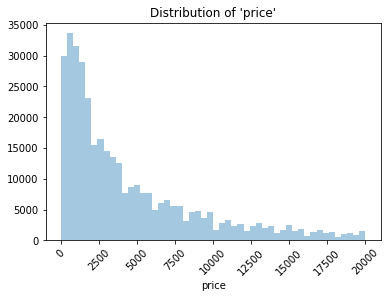

In [51]:
sns.distplot(data['price'], kde=False)
plt.title("Distribution of 'price'")
plt.xticks(rotation=45) 
plt.show();

* 'price' is heavily skewed to the right - there are many more lower-end cars than higher-end ones. 
* There are even cars with a price tag of zero.

In [52]:
data['not_repaired'].value_counts()

no     247161
yes     36054
Name: not_repaired, dtype: int64

In [53]:
data['vehicle_type'].value_counts()

sedan          91457
small          79831
wagon          65166
bus            28775
convertible    20203
coupe          16163
suv            11996
other           3288
Name: vehicle_type, dtype: int64

In [54]:
data['fuel_type'].value_counts()

petrol      216352
gasoline     98720
lpg           5310
cng            565
hybrid         233
other          204
electric        90
Name: fuel_type, dtype: int64

In [55]:
data['gearbox'].value_counts()

manual    268251
auto       66285
Name: gearbox, dtype: int64

In [56]:
data['model'].value_counts().count()

250

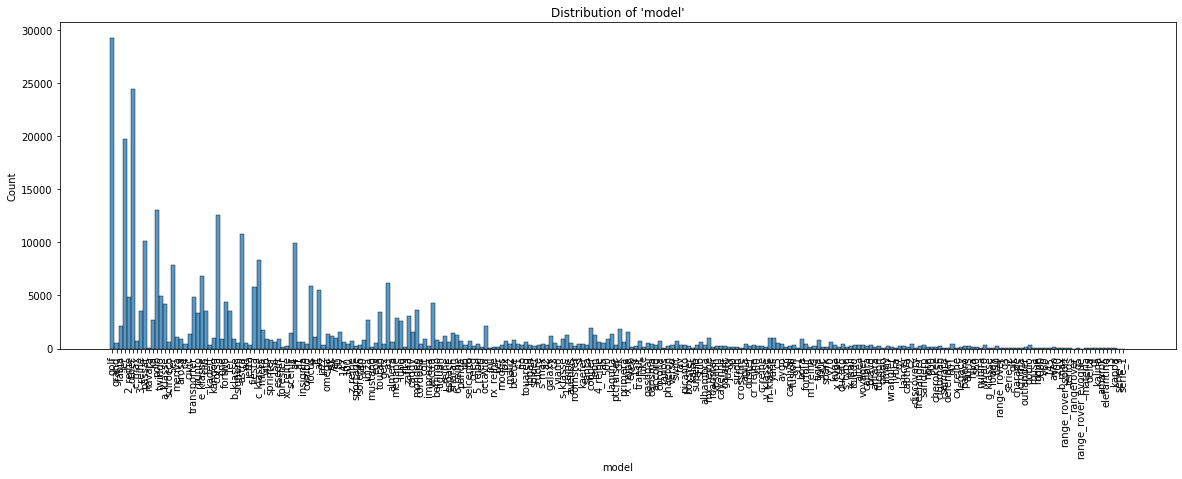

In [57]:
plt.figure(figsize=(20, 6))
sns.histplot(data['model'])
plt.title("Distribution of 'model'")
plt.xticks(rotation=90) 
plt.show();

* 'not_repaired': 2 categories
* 'vehicle_type': 8 categories
* 'fuel_type': 7 categories
* 'gearbox': 2 categories
* 'model': 250 categories


* We will be checking against these distributions after imputing the missing values. 

**Although not missing values, some columns contain illogical values.**

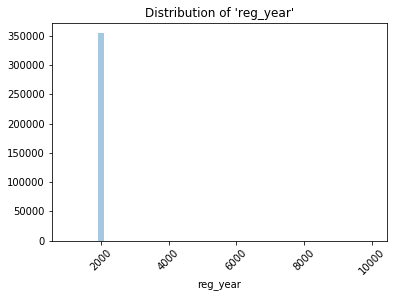

In [58]:
sns.distplot(data['reg_year'], kde=False)
plt.title("Distribution of 'reg_year'")
plt.xticks(rotation=45) 
plt.show();

In [59]:
data[((data['reg_year'] > 2021) | (data['reg_year'] < 1888))].count()

price           171
vehicle_type      0
reg_year        171
gearbox          33
power           171
model            96
mileage         171
reg_month       171
fuel_type        43
brand           171
not_repaired     24
dtype: int64

* While the absolute majority is around the year 2000, the graph's x-axis extends to the year 10,000, which is clearly some kind of error. This will be looked at in more detail later. 
* There are 105 "cars from the future" with 'reg_year' after the year 2021 and 66 "cars from another planet" with 'reg_year' that precedes 1888, the year in which the very first car was manufactured in the history of mankind according to Wikipedia. Since there are too many such records for them to be clerical errors, these must be some kind of indication to say either that the car is very old or that the owner did not want to reveal the year of registration.  
* An investigation suggests that 'reg_year' cannot be inferred with satisfactory accuracy from the other features such as 'brand' and 'model' since there are several trim versions. 

To do: mark these records with '0' to indicate that correct information is missing. 

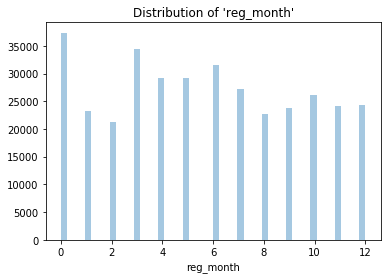

In [60]:
sns.distplot(data['reg_month'], kde=False)
plt.title("Distribution of 'reg_month'")
plt.show();

In [61]:
data[data['reg_month'] == 0].count()

price           37352
vehicle_type    22436
reg_year        37352
gearbox         27583
power           37352
model           30810
mileage         37352
reg_month       37352
fuel_type       23715
brand           37352
not_repaired    15256
dtype: int64

* There are records where the registration month is set to zero. Since there is no such month in a year and there are way too many such records, this is probably a way of indicating that no information was provided by the owner. 

To do: no action item

In [62]:
data[((data['power'] > 1499) | (data['power'] < 5))].count()

price           40515
vehicle_type    25844
reg_year        40515
gearbox         27186
power           40515
model           34148
mileage         40515
reg_month       40515
fuel_type       28799
brand           40515
not_repaired    18997
dtype: int64

* According to Dr Google, horsepower ranges between 5 hp and 1500 hp. 0 presumably means the information was not provided by the owner or was lost during data transfer between systems. There are 207 records with 'power' above 1500 hp and 40308 records with 'power' below 5 hp (including 0 hp). 


To do: 
* Due to the small difference between 1 and 5, let us leave the records with 'power' less than 5 as they are.
* As for the records with 'power' above 1500, let us take the first three digits. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very nice! You explored the data and noted some weird values!
	  
</div>

**Check for multicollinearity among the numerical variables.**

<Figure size 1440x720 with 0 Axes>

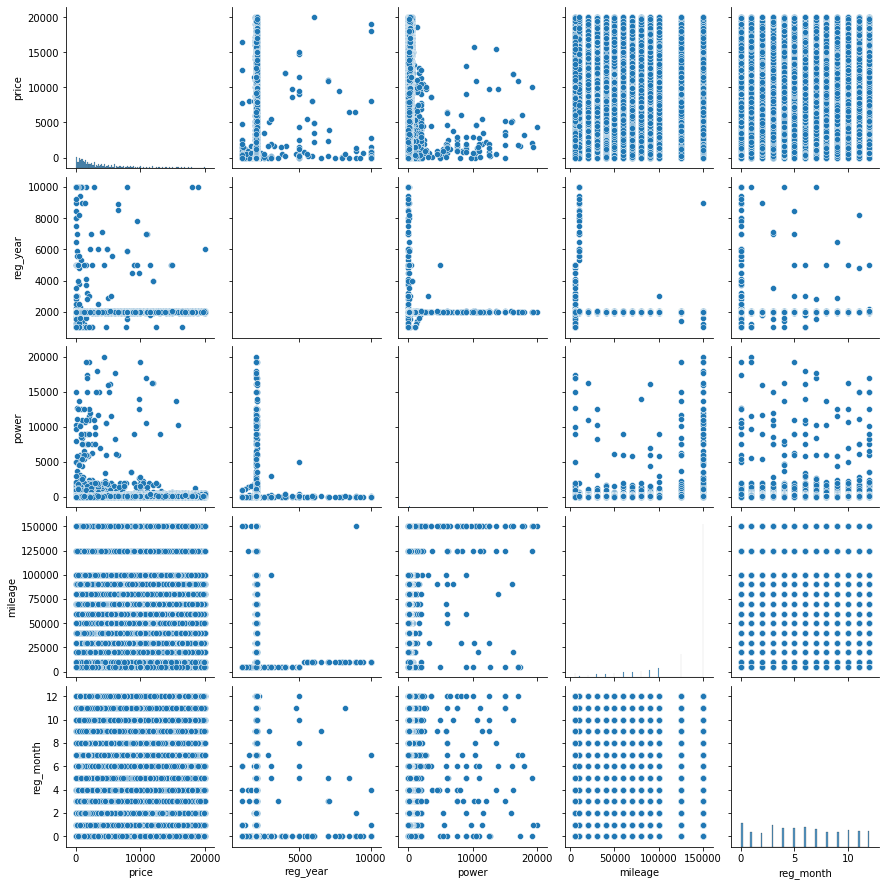

In [63]:
# plot a scatter matrix
plt.figure(figsize=(20, 10))
sns.pairplot(data)
plt.show();

**Look at the linear relationships between the numerical variable features and between each feature and the numerical variable target.**

In [64]:
data.corr('spearman')

,price,reg_year,power,mileage,reg_month
price,1.000000,0.550988,0.512604,-0.314412,0.155247
reg_year,0.550988,1.000000,0.160182,-0.294567,0.052692
power,0.512604,0.160182,1.000000,0.084509,0.128826
mileage,-0.314412,-0.294567,0.084509,1.000000,-0.011119
reg_month,0.155247,0.052692,0.128826,-0.011119,1.000000


* No multicollinearity detected. 
* 'reg_year', followed by 'power' show correlation of moderate strength with 'price'.
* We can see that 'mileage' negatively affects 'price', which is logical.
* 'reg_month' does not have much influence on 'price'. 
* None of the variables follow a normal distribution. 

We are required to use a linear regression model and a random forest model in this project. We will need feature encoding and feature scaling. 


Since we have quite a few categorical variables, some of which with high caridnality, turning their string values to numerical values by encoding will be quite messy. Tree-based models will be ideal, implemented with native categorical feature support (i.e. not needing the categorical features to be encoded). 

We will be trying CatBoost, LightGBM and XGBoost as per the project instructions. Using tree-based models also will not require feature scaling to be performed as they are not sensitive to the the variance in the data.


<br>We will prepare datasets (A) to (E) and choose one on which the models show the best performance, then perform feature encoding and feature scaling to allow for the other models to run. 

(A) Missing values imputed manually; illogical values handled
<br>(B) Missing values imputed using SimpleImputer; illogical values intact
<br>(C) Missing values imputed using SimpleImputer; illogical values handled
<br>(D) Missing values and illogical values intact
<br>(E) Missing values and illogical values removed
<br>
<br>(F) Feature-encoded by expressing each category in a feature as a ratio of its occurrence to the total
<br>(G) OHE applied and several columns dropped

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Wow, that's a really exhaustive plan!
	  
</div>

**(A) Missing values imputed; illogical values handled**

In [65]:
# split the data and reserve the test dataset on the side
X_train, X_test, y_train, y_test = \
            train_test_split(data.drop('price', axis=1), data.price, test_size=0.2, random_state=12345)

In [66]:
X_train.shape # (283495, 10)
y_train.shape # (283495,)   

X_test.shape # (70874, 10)  
y_test.shape # (70874,)

(70874,)

Clean the training data.

In [67]:
# 1) mark 'reg_year' < 1888 or 'reg_year' > 2021 with '0' to indicate that correct information is missing
X_train.loc[((X_train['reg_year'] > 2021) | (X_train['reg_year'] < 1888)), 'reg_year'] = 0

# 2) for the records with 'power' above 1500, take the first three digits
X_train['power'] = X_train['power'].apply(lambda x: int(str(x)[:3]) if x > 1499 else x)

# 3) impute the missing values in 'not_repaired' with the most common value according to the same 'reg_year' and 'brand'
# store the list of indices
X_train_index = X_train.index

# find the most common value using the portion of the training dataset with no missing values
temp = X_train.groupby(['reg_year', 'brand'])['not_repaired'].value_counts()
not_repaired_frequent = pd.DataFrame(temp).stack(level=0).reset_index().drop(['level_3', 0], axis=1)

# merge the column with the most common values to the dataframe
X_train = pd.merge(X_train, not_repaired_frequent, on=['reg_year','brand'], how='left')

# keep only the rows with the original indices
X_train = X_train.loc[X_train_index] # back to 283495 rows

# fill the original 'not_repaired' column where there is NaN
X_train['not_repaired_x'] = X_train['not_repaired_x'].fillna(X_train['not_repaired_y'])
X_train.drop('not_repaired_y', axis=1, inplace=True)
X_train.rename(columns={'not_repaired_x': 'not_repaired'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
X_train['not_repaired'] = X_train['not_repaired'].replace(np.NaN, "unknown")

# 4) impute the missing values in 'model' with the most common value according to the same 'reg_year' and 'brand'
# find the most common value using the portion of the training dataset with no missing values
temp = X_train.groupby(['reg_year', 'brand'])['model'].value_counts()
model_frequent = pd.DataFrame(temp).stack(level=0).reset_index().drop(['level_3', 0], axis=1)

# merge the column with the most common values to the dataframe
X_train = pd.merge(X_train, model_frequent, on=['reg_year','brand'], how='left')

# keep only the rows with the original indices
X_train = X_train.loc[X_train_index] # back to 283495 rows

# fill the original 'model' column where there is NaN
X_train['model_x'] = X_train['model_x'].fillna(X_train['model_y'])
X_train.drop('model_y', axis=1, inplace=True)
X_train.rename(columns={'model_x': 'model'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
X_train['model'] = X_train['model'].replace(np.NaN, "unknown")

# 5) impute the missing values in 'vehicle_type' with the most common value according to the same 'reg_year', 'brand' and 'model'
# find the most common value using the portion of the training dataset with no missing values
temp = X_train.groupby(['reg_year', 'brand', 'model'])['vehicle_type'].value_counts()
vehicle_type_frequent = pd.DataFrame(temp).stack(level=0).reset_index().drop(['level_4', 0], axis=1)

# merge the column with the most common values to the dataframe
X_train = pd.merge(X_train, vehicle_type_frequent, on=['reg_year', 'brand', 'model'], how='left')

# keep only the rows with the original indices
X_train = X_train.loc[X_train_index] # back to 283495 rows

# fill the original 'vehicle_type' column where there is NaN
X_train['vehicle_type_x'] = X_train['vehicle_type_x'].fillna(X_train['vehicle_type_y'])
X_train.drop('vehicle_type_y', axis=1, inplace=True)
X_train.rename(columns={'vehicle_type_x': 'vehicle_type'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
X_train['vehicle_type'] = X_train['vehicle_type'].replace(np.NaN, "unknown")

# 6) impute the missing values in 'fuel_type' with the most common value according to the same 'reg_year', 'brand' and 'model'
# find the most common value using the portion of the training dataset with no missing values
temp = X_train.groupby(['reg_year', 'brand', 'model'])['fuel_type'].value_counts()
fuel_type_frequent = pd.DataFrame(temp).stack(level=0).reset_index().drop(['level_4', 0], axis=1)

# merge the column with the most common values to the dataframe
X_train = pd.merge(X_train, fuel_type_frequent, on=['reg_year', 'brand', 'model'], how='left')

# keep only the rows with the original indices
X_train = X_train.loc[X_train_index] # back to 283495 rows

# fill the original 'fuel_type' column where there is NaN
X_train['fuel_type_x'] = X_train['fuel_type_x'].fillna(X_train['fuel_type_y'])
X_train.drop('fuel_type_y', axis=1, inplace=True)
X_train.rename(columns={'fuel_type_x': 'fuel_type'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
X_train['fuel_type'] = X_train['fuel_type'].replace(np.NaN, "unknown")

# 7) impute the missing values in 'gearbox' with the most common value according to the same 'reg_year', 'brand' and 'model'
# find the most common value using the portion of the training dataset with no missing values
temp = X_train.groupby(['reg_year', 'brand', 'model'])['gearbox'].value_counts()
gearbox_frequent = pd.DataFrame(temp).stack(level=0).reset_index().drop(['level_4', 0], axis=1)

# merge the column with the most common values to the dataframe
X_train = pd.merge(X_train, gearbox_frequent, on=['reg_year', 'brand', 'model'], how='left')

# keep only the rows with the original indices
X_train = X_train.loc[X_train_index] # back to 283495 rows

# fill the original 'gearbox' column where there is NaN
X_train['gearbox_x'] = X_train['gearbox_x'].fillna(X_train['gearbox_y'])
X_train.drop('gearbox_y', axis=1, inplace=True)
X_train.rename(columns={'gearbox_x': 'gearbox'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
X_train['gearbox'] = X_train['gearbox'].replace(np.NaN, "unknown")

In [68]:
def compare_distibutions(df, col):
    # compare the imputed distribution against the original
    if col=='model':
        plt.figure(figsize=(20, 6))
    sns.histplot(data[col], color='r', stat="density")
    sns.histplot(df[col], color='b', alpha=0.5, stat="density")
    plt.title("Distribution of the feature")
    plt.xticks(rotation=90) 
    plt.show();   

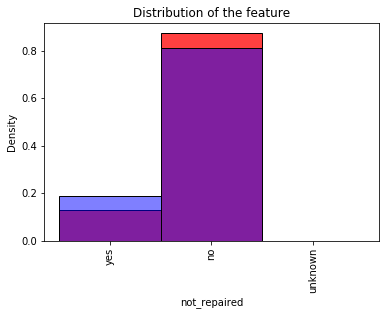

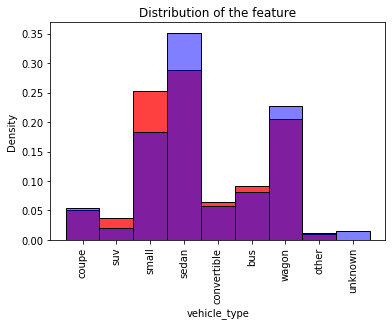

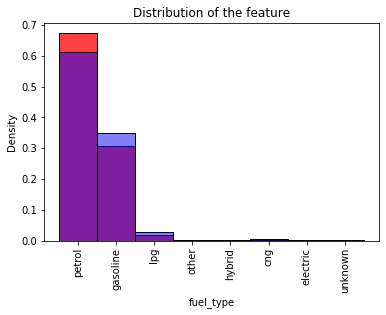

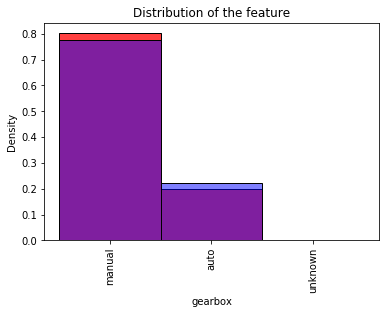

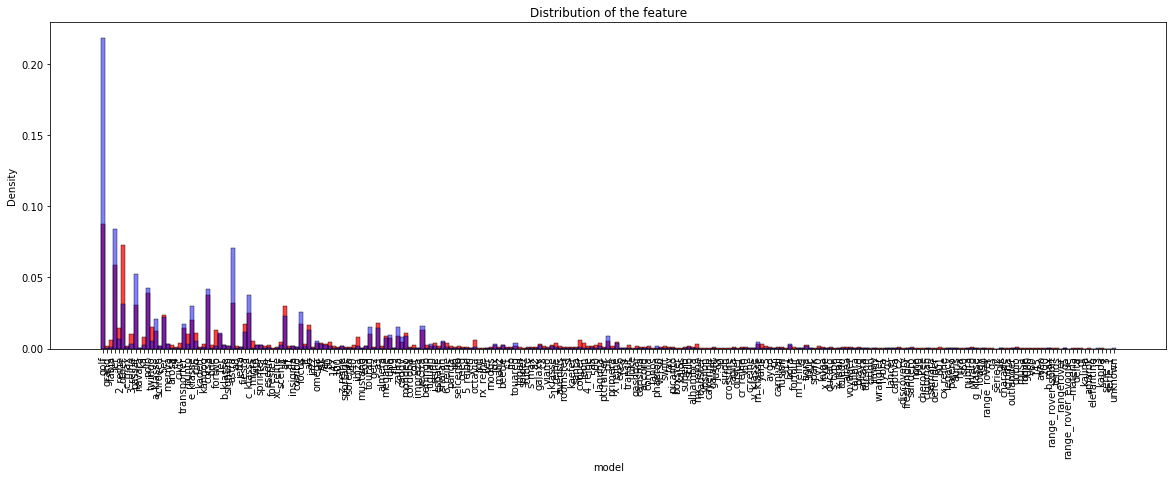

In [69]:
# compare the distributions of each feature against the original data
compare_distibutions(X_train, 'not_repaired')
compare_distibutions(X_train, 'vehicle_type')
compare_distibutions(X_train, 'fuel_type')
compare_distibutions(X_train, 'gearbox')
compare_distibutions(X_train, 'model')

The distributions of the features changed after the imputation especially in 'model'.

We will try imputing the test dataset with the information from the training dataset, and compare the model performance against the non-imputed pair of training and test datasets.

In [70]:
# 1) mark 'reg_year' < 1888 or 'reg_year' > 2021 with '0' to indicate that correct information is missing
X_test.loc[((X_test['reg_year'] > 2021) | (X_test['reg_year'] < 1888)), 'reg_year'] = 0

# 2) for the records with 'power' above 1500, take the first three digits
X_test['power'] = X_test['power'].apply(lambda x: int(str(x)[:3]) if x > 1499 else x)

# store the list of indices
X_test_index = X_test.index
X_test_index

# 3) imputing the missing values with the most common value in 'not_repaired' from the training dataset
X_test = X_test.reset_index().merge(not_repaired_frequent, on=['reg_year','brand'], how='left').set_index('index')
X_test = X_test[~X_test.index.duplicated(keep='last')]
X_test = X_test.loc[X_test_index] # back to 70874 rows

# fill the original 'not_repaired' column where there is NaN
X_test['not_repaired_x'] = X_test['not_repaired_x'].fillna(X_test['not_repaired_y'])
X_test.drop('not_repaired_y', axis=1, inplace=True)
X_test.rename(columns={'not_repaired_x': 'not_repaired'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
#X_test['not_repaired'] = X_test['not_repaired'].cat.add_categories("unknown").fillna("unknown")
X_test['not_repaired'] = X_test['not_repaired'].replace(np.NaN, "unknown")

# 4) imputing the missing values with the most common value in 'model_frequent' from the training dataset
X_test = X_test.reset_index().merge(model_frequent, on=['reg_year','brand'], how='left').set_index('index')
X_test = X_test[~X_test.index.duplicated(keep='last')]
X_test = X_test.loc[X_test_index] # back to 70874 rows

# fill the original 'model' column where there is NaN
X_test['model_x'] = X_test['model_x'].fillna(X_test['model_y'])
X_test.drop('model_y', axis=1, inplace=True)
X_test.rename(columns={'model_x': 'model'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
#X_test['model'] = X_test['model'].cat.add_categories("unknown").fillna("unknown")
X_test['model'] = X_test['model'].replace(np.NaN, "unknown")

# 5) imputing the missing values with the most common value in 'vehicle_type_frequent' from the training dataset
X_test = X_test.reset_index().merge(vehicle_type_frequent, on=['reg_year', 'brand', 'model'], how='left').set_index('index')
X_test = X_test[~X_test.index.duplicated(keep='last')]
X_test = X_test.loc[X_test_index] # back to 70874 rows

# fill the original 'vehicle_type' column where there is NaN
X_test['vehicle_type_x'] = X_test['vehicle_type_x'].fillna(X_test['vehicle_type_y'])
X_test.drop('vehicle_type_y', axis=1, inplace=True)
X_test.rename(columns={'vehicle_type_x': 'vehicle_type'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
#X_test['vehicle_type'] = X_test['vehicle_type'].cat.add_categories("unknown").fillna("unknown")
X_test['vehicle_type'] = X_test['vehicle_type'].replace(np.NaN, "unknown")

# 6) imputing the missing values with the most common value in 'fuel_type_frequent' from the training dataset
X_test = X_test.reset_index().merge(fuel_type_frequent, on=['reg_year', 'brand', 'model'], how='left').set_index('index')
X_test = X_test[~X_test.index.duplicated(keep='last')]
X_test = X_test.loc[X_test_index] # back to 70874 rows

# fill the original 'fuel_type' column where there is NaN
X_test['fuel_type_x'] = X_test['fuel_type_x'].fillna(X_test['fuel_type_y'])
X_test.drop('fuel_type_y', axis=1, inplace=True)
X_test.rename(columns={'fuel_type_x': 'fuel_type'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
#X_test['fuel_type'] = X_test['fuel_type'].cat.add_categories("unknown").fillna("unknown")
X_test['fuel_type'] = X_test['fuel_type'].replace(np.NaN, "unknown")

# 7) imputing the missing values with the most common value in 'gearbox_frequent' from the training dataset
X_test = X_test.reset_index().merge(gearbox_frequent, on=['reg_year', 'brand', 'model'], how='left').set_index('index')
X_test = X_test[~X_test.index.duplicated(keep='last')]
X_test = X_test.loc[X_test_index] # back to 70874 rows

# fill the original 'gearbox' column where there is NaN
X_test['gearbox_x'] = X_test['gearbox_x'].fillna(X_test['gearbox_y'])
X_test.drop('gearbox_y', axis=1, inplace=True)
X_test.rename(columns={'gearbox_x': 'gearbox'}, inplace=True)

# fill the remaining missing values with "unknown" to indicate a third category
#X_test['gearbox'] = X_test['gearbox'].cat.add_categories("unknown").fillna("unknown")
X_test['gearbox'] = X_test['gearbox'].replace(np.NaN, "unknown")

In [71]:
X_train.shape # (283495, 10) 
y_train.shape # (283495,)    

X_test.shape # (70874, 10)   
y_test.shape # (70874,)

(70874,)

**(B) Missing values imputed using SimpleImputer(); illogical values intact**

In [72]:
# split the original data and reserve the test dataset on the side
X_train_si, X_test_si, y_train_si, y_test_si = \
            train_test_split(data.drop('price', axis=1), data.price, test_size=0.2, random_state=12345)

In [73]:
X_train_si.shape # (283495, 10)
y_train_si.shape # (283495,)

X_test_si.shape # (70874, 10) 
y_test_si.shape # (70874,)

(70874,)

In [74]:
# CatboostRegressor cannot handle arrays - keep the column headers
X_train_si_columns = X_train_si.columns
X_test_si_columns = X_test_si.columns

In [75]:
start = time.time()
print("Starting to impute at", start)

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train_si)

end = time.time()
print("Ending to impute at", end)
print(end - start, 's')

Ending the training at 1636661041.5423412
105.03214311599731 s


In [76]:
X_train_imputed = imputer.transform(X_train_si)
X_test_imputed = imputer.transform(X_test_si)

In [77]:
# add back the column headers
X_train_imputed2 = pd.DataFrame(X_train_imputed, columns=X_train_si_columns)
X_test_imputed2 = pd.DataFrame(X_test_imputed, columns=X_test_si_columns)

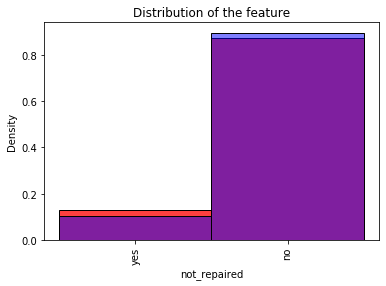

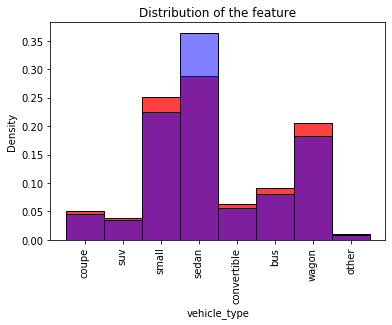

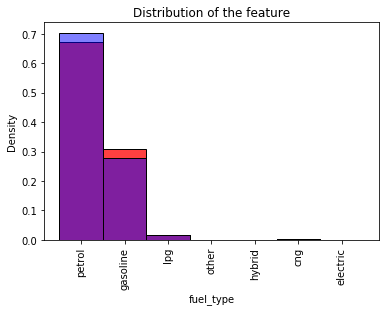

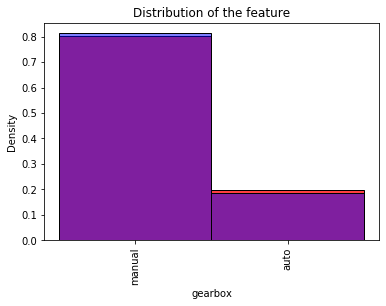

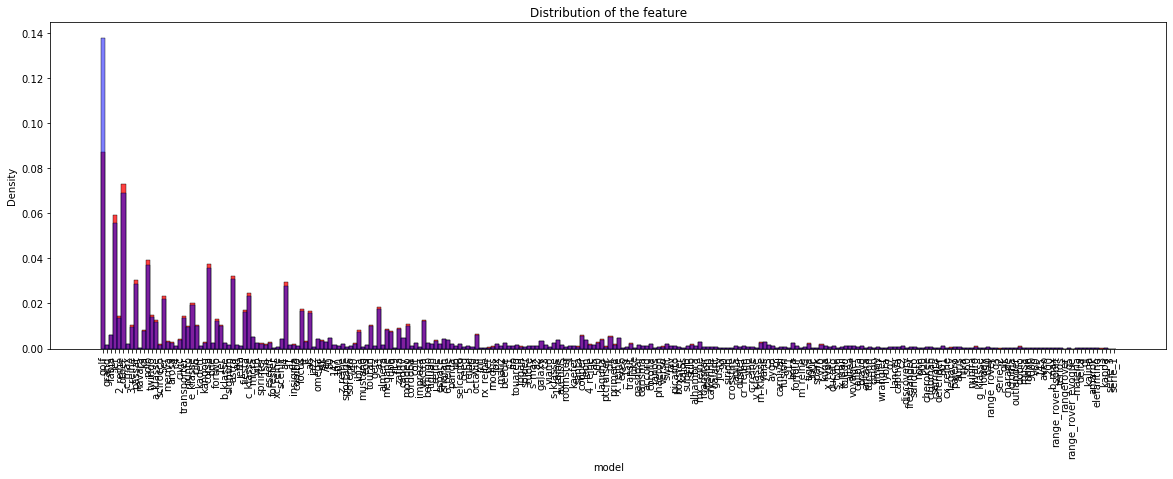

In [78]:
# compare the distributions of each feature against the original data
compare_distibutions(X_train_imputed2, 'not_repaired')
compare_distibutions(X_train_imputed2, 'vehicle_type')
compare_distibutions(X_train_imputed2, 'fuel_type')
compare_distibutions(X_train_imputed2, 'gearbox')
compare_distibutions(X_train_imputed2, 'model')

There are discrepancies in the distributions but much less than our earlier manual technique.

**(C) Missing values imputed using SimpleImputer(); illogical values handled**

In [9]:
# split the original data and reserve the test dataset on the side
X_train_si_out, X_test_si_out, y_train_si_out, y_test_si_out = \
            train_test_split(data.drop('price', axis=1), data.price, test_size=0.2, random_state=12345)

In [10]:
X_train_si_out_columns = X_train_si_out.columns
X_test_si_out_columns = X_test_si_out.columns

In [11]:
# mark 'reg_year' < 1888 or 'reg_year' > 2021 with '0' to indicate that correct information is missing
X_train_si_out.loc[((X_train_si_out['reg_year'] > 2021) | (X_train_si_out['reg_year'] < 1888)), 'reg_year'] = 0

# for the records with 'power' above 1500, take the first three digits
X_train_si_out['power'] = X_train_si_out['power'].apply(lambda x: int(str(x)[:3]) if x > 1499 else x)

# mark 'reg_year' < 1888 or 'reg_year' > 2021 with '0' to indicate that correct information is missing
X_test_si_out.loc[((X_test_si_out['reg_year'] > 2021) | (X_test_si_out['reg_year'] < 1888)), 'reg_year'] = 0

# for the records with 'power' above 1500, take the first three digits
X_test_si_out['power'] = X_test_si_out['power'].apply(lambda x: int(str(x)[:3]) if x > 1499 else x)

In [12]:
X_train_si_out.shape # (283495, 10)
y_train_si_out.shape # (283495,)

X_test_si_out.shape # (70874, 10) 
y_test_si_out.shape # (70874,)

(70874,)

In [13]:
start = time.time()
print("Starting to impute at", start)

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X_train_si_out)

end = time.time()
print("Ending to impute at", end)
print(end - start, 's')

Starting to impute at 1636693444.6828277
Ending to impute at 1636693550.4409807
105.75815296173096 s


In [14]:
X_train_imputed_out = imputer.transform(X_train_si_out)
X_test_imputed_out = imputer.transform(X_test_si_out)

In [15]:
# add back the column headers
X_train_imputed_out2 = pd.DataFrame(X_train_imputed_out, columns=X_train_si_out_columns)
X_test_imputed_out2 = pd.DataFrame(X_test_imputed_out, columns=X_test_si_out_columns)

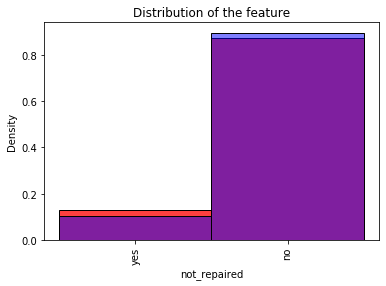

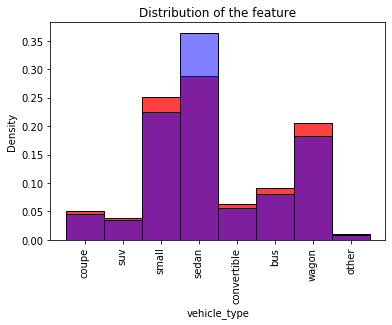

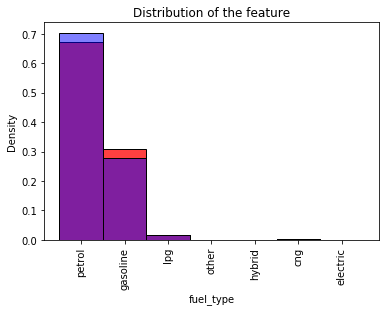

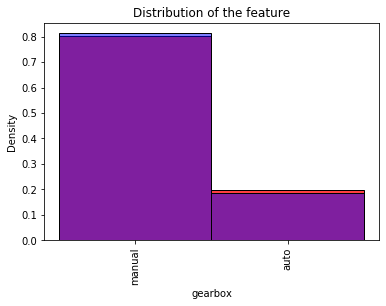

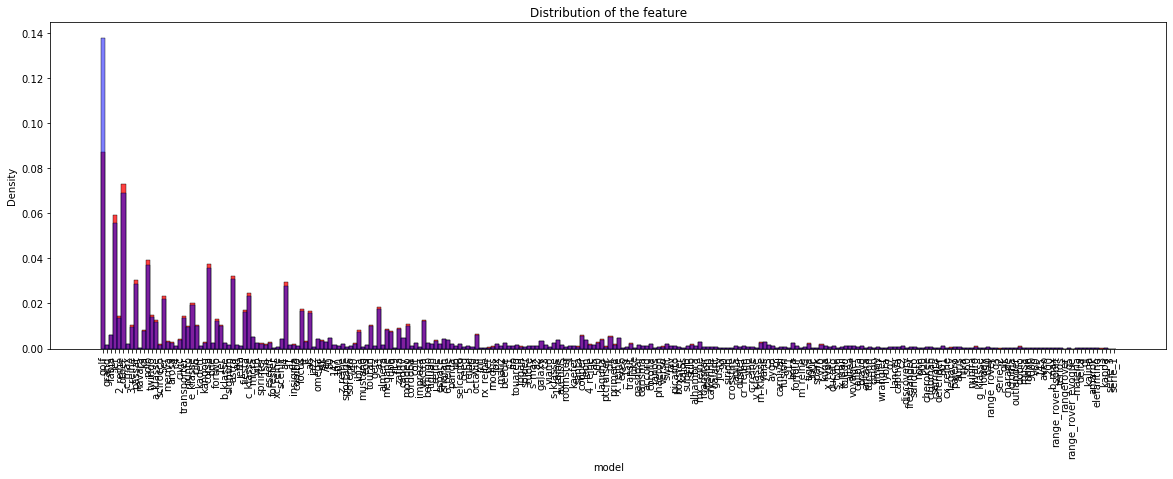

In [86]:
# compare the distributions of each feature against the original data
compare_distibutions(X_train_imputed_out2, 'not_repaired')
compare_distibutions(X_train_imputed_out2, 'vehicle_type')
compare_distibutions(X_train_imputed_out2, 'fuel_type')
compare_distibutions(X_train_imputed_out2, 'gearbox')
compare_distibutions(X_train_imputed_out2, 'model')

Pretty much the same degree of discrepancies as the datasets imputed by SimpleImputer() without the outliers handled. 

**(D) Missing values and illogical values intact**

In [87]:
X_raw = data.drop('price', axis=1) 
y_raw = data.price

# transform categorical features from 'object' data type to 'category' data type
# this way, we can achieve up to 8x speed up hen using LGBM
for col in X_raw.columns:
    col_type = X_raw[col].dtype
    if col_type == 'object':
        X_raw[col] = X_raw[col].astype('category')

In [88]:
# split the original data and reserve the test dataset on the side
X_train_raw, X_test_raw, y_train_raw, y_test_raw = \
            train_test_split(X_raw, y_raw, test_size=0.2, random_state=12345)

In [89]:
X_train_raw.shape # (283495, 10)
y_train_raw.shape # (283495,)

X_test_raw.shape # (70874, 10) 
y_test_raw.shape # (70874,)

(70874,)

Here, the data distributions are thoes of the original dataset. 

**(E) Missing values and illogical values removed**

In [90]:
# remove all the missing values
data2 = data.dropna()

In [91]:
# remove the illogical values (outliers)
data2 = data2[data2['reg_month'] > 0]
data2 = data2[((data2['power'] <= 1500) & (data2['power'] >= 5))]

In [92]:
X_raw2 = data2.drop('price', axis=1)
y_raw2 = data2.price

# transform categorical features from 'object' data type to 'category' data type
# this way, we can achieve up to 8x speed up hen using LGBM
for col in X_raw2.columns:
    col_type = X_raw2[col].dtype
    if col_type == 'object':
        X_raw2[col] = X_raw2[col].astype('category')

In [93]:
# split the data and reserve the test dataset on the side
# make sure the column headers are there for Catboost
X_train_naive, X_test_naive, y_train_naive, y_test_naive = \
            train_test_split(X_raw2, y_raw2, test_size=0.2, random_state=12345)

In [94]:
X_train_naive.shape # (184000, 10)
y_train_naive.shape # (184000,)

X_test_naive.shape # (46000, 10)
y_test_naive.shape # (46000,)

(46000,)

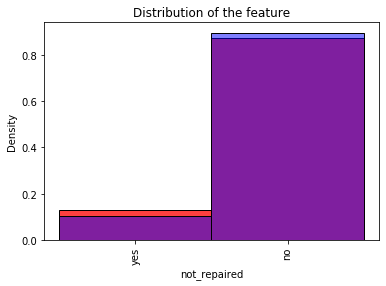

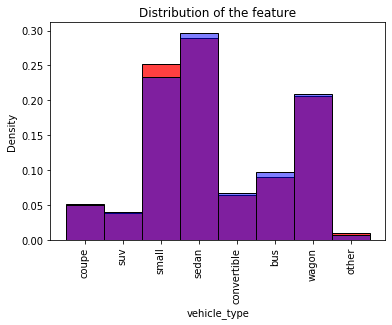

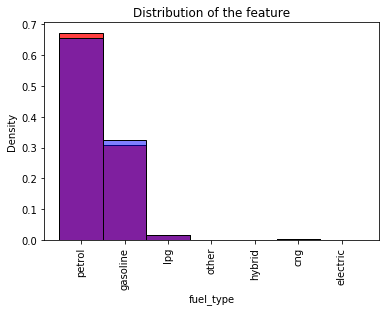

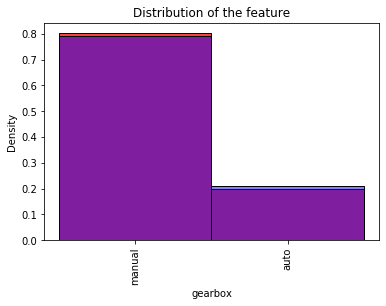

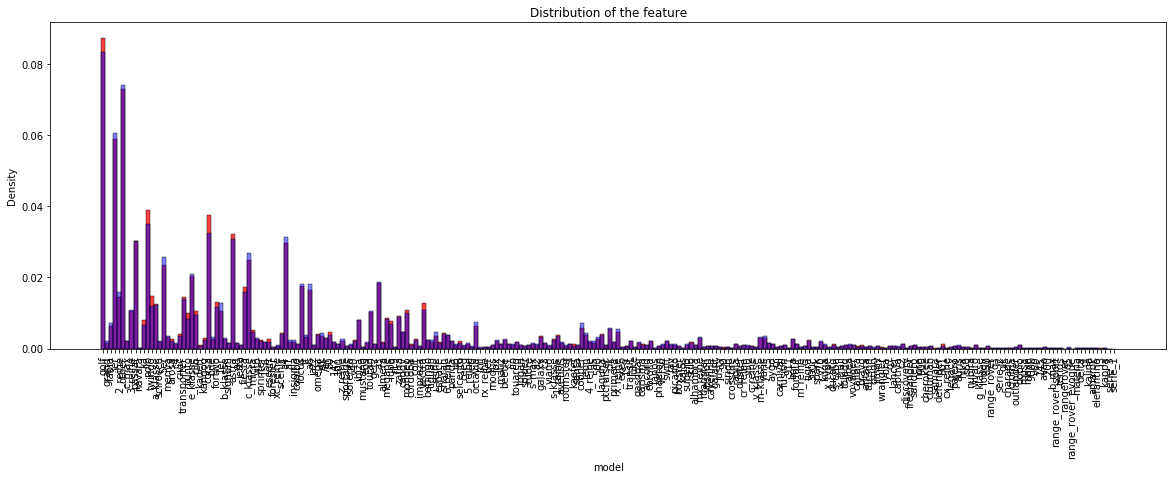

In [95]:
# compare the distributions of each feature against the original data
compare_distibutions(X_train_naive, 'not_repaired')
compare_distibutions(X_train_naive, 'vehicle_type')
compare_distibutions(X_train_naive, 'fuel_type')
compare_distibutions(X_train_naive, 'gearbox')
compare_distibutions(X_train_naive, 'model')

The distribution is very similar to the original one. 

## Model training

**Set the baseline with a dummy model.**

We have five sets of training-test dataset-pairs:

<br>(A) Missing values imputed manually; illogical values handled (X_train, y_train, X_test, y_test)
<br>(B) Missing values imputed using SimpleImputer; illogical values intact (X_train_imputed2, y_train_si, X_test_imputed2, y_test_si)
<br>(C) Missing values imputed using SimpleImputer; illogical values handled (X_train_imputed_out2, y_train_si_out, X_test_imputed_out2, X_test_si_out)
<br>(D) Missing values and illogical values intact (X_train_raw, y_train_raw, X_test_raw, y_test_raw)
<br>(E) Missing values and illogical values removed (X_train_naive, y_train_naive, X_test_naive, y_train_naive)

However, the values of the target variable 'price' were not touched, and the random_state parameter was set to the same number (12345) in all three splits, so the RMSE score should be the same for all three. 

Let us check how a constant model will fare with datasets (C).

In [96]:
# datasets (C): build a constant model as a benchmark. It predicts the mean value in 'price' for each observation
constant_pred = pd.DataFrame(index=range(len(y_test_si_out)), columns=['price'])
constant_pred['price'] = y_train_si_out.mean()

In [97]:
# assess the baseline performance
print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, constant_pred.values)))

RMSE: 4520.757803553604


The models are expected to score at least this much. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Ok, there's a baseline!
	  
</div>

LinearRegression, DecisionTreeRegressor and RandomForestRegressor require the data to be encoded. We have ten variables in the dataset and 'model' alone has 250 categories. Encoding all the variables and their categories will be way too overwhelming for the models to process. 

Since CatBoostRegression and LightBGM need no feature encoding, we will let them take on all ten variables, and suggest which features to drop through feature selection. We will also assess the performance of the models on the datasets and choose one  training-test dataset-pair that allows them to perform the best. We will take that dataset-pair to apply feature encoding and scaling for the other models. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
At least for tree-based models it's possible to use ordinal encoding instead of one-hot encoding
	  
</div>

### CatBoostRegression

* Cannot handle missing values in categorical features. So imputed. 
* Can handle categorical "string" values as they are.
* No need for feature scaling since it is a tree-based model.

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
> Cannot handle missing values in categorical features
    
I don't think that's true
	  
</div>

In [99]:
# an initial run on datasets (A)

# in addition to target and features, pass the categorical features to the model
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

start = time.time()
print("Starting the training at", start)

catboost_cleaned = CatBoostRegressor(
    random_seed=12345,
    iterations=10,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE',
    l2_leaf_reg=1
)

catboost_cleaned.fit(X_train, y_train, cat_features=cat_features, verbose=10)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662031.7199476
0:	learn: 4511.7838949	total: 726ms	remaining: 6.53s
9:	learn: 4508.3316221	total: 4.5s	remaining: 0us
Ending the training at 1636662038.3332813
6.613333702087402 s


In [100]:
y_pred_test = catboost_cleaned.predict(X_test)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_test)))

RMSE: 4525.827866541819


* The RMSE score is not much better than the baseline and is not getting any better. Even at the top boundary of the recommended learning rate (between 0.1 and 0.3).


Switching the dataset.

In [101]:
# run on datasets (B)

cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

start = time.time()
print("Starting the training at", start)

catboost_imputed = CatBoostRegressor(
    random_seed=12345,
    iterations=150,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE'
)

catboost_imputed.fit(X_train_imputed2, y_train_si, cat_features=cat_features, verbose=50)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662042.5750415
0:	learn: 3632.8475001	total: 419ms	remaining: 1m 2s
50:	learn: 1757.8799168	total: 19.7s	remaining: 38.3s
100:	learn: 1669.2003459	total: 39s	remaining: 18.9s
149:	learn: 1613.8972254	total: 58s	remaining: 0us
Ending the training at 1636662102.9630928
60.3880512714386 s


In [102]:
y_pred_test = catboost_imputed.predict(X_test_imputed2)
print('RMSE:', np.sqrt(mean_squared_error(y_test_si, y_pred_test)))

RMSE: 1760.4133458900767


In [103]:
# run on datasets (C)

cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

start = time.time()
print("Starting the training at", start)

catboost_imputed_out = CatBoostRegressor(
    random_seed=12345,
    iterations=150,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE'
)

catboost_imputed_out.fit(X_train_imputed_out2, y_train_si_out, cat_features=cat_features, verbose=50)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662108.3525667
0:	learn: 3637.7042923	total: 429ms	remaining: 1m 3s
50:	learn: 1751.7264133	total: 19.7s	remaining: 38.1s
100:	learn: 1659.7876657	total: 38.6s	remaining: 18.7s
149:	learn: 1608.0881734	total: 57.4s	remaining: 0us
Ending the training at 1636662168.1486313
59.796064615249634 s


In [104]:
y_pred_test = catboost_imputed_out.predict(X_test_imputed_out2)
print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred_test)))

RMSE: 1758.6819958910821


In [105]:
# run on datasets (E)

cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

start = time.time()
print("Starting the training at", start)

catboost_naive = CatBoostRegressor(
    random_seed=12345,
    iterations=150,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE'
)

catboost_naive.fit(X_train_naive, y_train_naive, cat_features=cat_features, verbose=50)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662174.2323613
0:	learn: 3745.8442368	total: 274ms	remaining: 40.8s
50:	learn: 1622.6432559	total: 12.7s	remaining: 24.7s
100:	learn: 1522.3889200	total: 25.3s	remaining: 12.3s
149:	learn: 1472.4214577	total: 37.6s	remaining: 0us
Ending the training at 1636662213.6247435
39.39238214492798 s


In [106]:
y_pred_test = catboost_naive.predict(X_test_naive)
print('RMSE:', np.sqrt(mean_squared_error(y_test_naive, y_pred_test)))

RMSE: 1628.7256405446442


The model produces the best RMSE score with datasets (E). This is a training-test dataset-pair, in both of which had all the missing values and illogical values removed. This, however, is not an ideal set of data. In a real-life scenario, the "test dataset" may be a single row of data sent as a request for estimating the worth of a car. Even if that request contains illogical information or is missing information in some features, the model is expected to make the best of the existing information and make a prediction. 


Deleting rows of data with missing or illogical values, therefore, is not an option in the test dataset. Missing values will have to be imputed, and the model will have to be equipped with an appropriate mechanism to handle such values. If that is case with the test dataset, then the training dataset will have to be treated the same way. 

So, datasets (C) seem to be the most reasonable choice. 

Since my feature selection code does not run on the hub as opposed to locally due to the difference in the installed version between my local environment and the hub, I get an error. 

In [19]:
# do feature selection
feature_names = list(X_train_imputed_out2.columns)
cat_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']

train_pool = Pool(X_train_imputed_out2, y_train_si_out, feature_names=feature_names, cat_features=cat_features)
test_pool = Pool(X_test_imputed_out2, y_test_si_out, feature_names=feature_names, cat_features=cat_features)

catboost_imputed_out2 = CatBoostRegressor(iterations=150, random_seed=12345)

summary = catboost_imputed_out2.select_features(
    train_pool,
    eval_set=test_pool,
    features_for_select=list(range(train_pool.num_col())),
    num_features_to_select=5,
    steps=None,
    algorithm=None, 
    shap_calc_type=None, 
    train_final_model=True,
    logging_level='Silent',
    plot=False
)
print('Selected features:', summary['selected_features_names'])

Selected features: ['vehicle_type', 'reg_year', 'power', 'mileage', 'brand']


* The selected features are very reasonable. 

Run the model again just with these features and see if there will be any improvement. 

In [16]:
X_train_imputed_out3 = X_train_imputed_out2.drop(['gearbox', 'reg_month', 'fuel_type', 'not_repaired', 'model'], axis=1)
X_test_imputed_out3 = X_test_imputed_out2.drop(['gearbox', 'reg_month', 'fuel_type', 'not_repaired', 'model'], axis=1)

In [32]:
cat_features = ['vehicle_type', 'brand']

start = time.time()
print("Starting the training at", start)

catboost_imputed_out3 = CatBoostRegressor(
    random_seed=12345,
    iterations=150,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE',
    l2_leaf_reg=1
)

catboost_imputed_out3.fit(X_train_imputed_out3, y_train_si_out, cat_features=cat_features, verbose=50)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636664738.3941815
0:	learn: 3635.4532144	total: 239ms	remaining: 35.6s
50:	learn: 1887.1926231	total: 12.1s	remaining: 23.5s
100:	learn: 1811.4689535	total: 23.8s	remaining: 11.5s
149:	learn: 1765.1127048	total: 35.3s	remaining: 0us
Ending the training at 1636664775.6364944
37.24231290817261 s


In [33]:
y_pred_test = catboost_imputed_out3.predict(X_test_imputed_out3)
print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred_test)))

RMSE: 1878.1975869553455


* The RMSE score got worse. It seems that we dropped some important features. After a little trial and error, we added back 'model' and 'not_repaired' to get a better performance. 

In [17]:
X_train_imputed_out3 = X_train_imputed_out2.drop(['gearbox', 'reg_month', 'fuel_type'], axis=1)
X_test_imputed_out3 = X_test_imputed_out2.drop(['gearbox', 'reg_month', 'fuel_type'], axis=1)

In [36]:
cat_features = ['vehicle_type', 'model', 'brand', 'not_repaired']

start = time.time()
print("Starting the training at", start)

catboost_imputed_out3 = CatBoostRegressor(
    random_seed=12345,
    iterations=150,
    learning_rate=0.3,
    depth=10,
    loss_function='RMSE',
    l2_leaf_reg=1
)

catboost_imputed_out3.fit(X_train_imputed_out3, y_train_si_out, cat_features=cat_features, verbose=50)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636664885.871778
0:	learn: 3639.1995608	total: 322ms	remaining: 47.9s
50:	learn: 1785.4905789	total: 15.7s	remaining: 30.5s
100:	learn: 1693.0463728	total: 30.9s	remaining: 15s
149:	learn: 1644.5736975	total: 46.3s	remaining: 0us
Ending the training at 1636664934.1981053
48.326327323913574 s


In [37]:
y_pred_test = catboost_imputed_out3.predict(X_test_imputed_out3)
print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred_test)))

RMSE: 1781.8519457334303


The randomized search method in the CatboostRegressor model performs cross validation and trains the model while at it, saving time on having to retrain the model after the cross validation. 

In [ ]:
feature_names = list(X_train_imputed_out3.columns)
cat_features = ['vehicle_type', 'model', 'brand', 'not_repaired']

# update the dataset with the selected features
train_pool2 = Pool(X_train_imputed_out3, y_train_si_out, feature_names=feature_names, cat_features=cat_features)
test_pool2 = Pool(X_test_imputed_out3, y_test_si_out, feature_names=feature_names, cat_features=cat_features)


start = time.time()
print("Starting the training at", start)

catboost_cv_model = CatBoostRegressor(verbose=50)

param_distribution = {
    'learning_rate': [0.03, 0.1, 0.3], 
    'l2_leaf_reg': [1, 3, 5, 7],
    'depth': [4, 6, 10]
}

randomized_search_results = catboost_cv_model.randomized_search(
    param_distribution,
    train_pool2,
    plot=True
)

end = time.time()
print("Ending the training at", end)
print(end - start, 's')

In [ ]:
# print out the parameters that give the best value of the loss function
randomized_search_results['params']

In [ ]:
# model is ready to use after the randomized search
start = time.time()
print("Starting the prediction at", start)

predicted = catboost_cv_model.predict(test_pool2)
print('RMSE:', np.sqrt(mean_squared_error(y_test_si, predicted)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

In [ ]:
sorted_feature_importance = catboost_cv_model.feature_importances_.argsort()
plt.barh(X_train_imputed3.columns[sorted_feature_importance], 
        catboost_cv_model.feature_importances_[sorted_feature_importance], 
        color='pink')
plt.xlabel("CatBoost Feature Importance")

* Algorithm: CatboostRegressor model 
* Best RMSE score: 1737.7985811124718
* Hyperparameters: 'iterations' = 1000, 'depth' = 10, 'l2_leaf_reg' = 1, 'learning_rate' = 0.1
* Dataset: imputed with the most common value in all the missing values of all the features using SimpleImputer
* Features in the order of importance: 'reg_year', 'power', 'brand', 'mileage', 'vehicle_type', 'model', 'not_repaired'


The model performed very badly on the training dataset in which the missing values were painstakingly imputed using the most common value using the other features and the illogical values were carefully analysed and replaced with other values. This is not surprising since the data distributions in the training and test dataset-pair are different from those of the original dataset. 

The Catboost regression algorithm is a tree-based so it is robust to outliers and requires no data scaling. It has an added advantage of being able to handle categorical "string" features as they are, with no need for encoding. It is also very logical and time-efficient that the model comes out trained and tuned after cross validation with randomized search and does not require retraining. Unlike in numerical vairables, CatBoostRegressor does not know how to handle missing values in categorical variables, but once they are imputed, we are good to go. Though the model was trained to the maximum number of iterations of 1000 each time, it shows no sign of overfitting. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
> Unlike in numerical vairables, CatBoostRegressor does not know how to handle missing values in categorical variables
    
Doesn't it treat missing values in the categorical features as "None" strings?
	  
> Though the model was trained to the maximum number of iterations of 1000 each time, it shows no sign of overfitting. 
    
I'm not sure how you know that, as I couldn't find if you compared train and test RMSE anywhere.
    
    
</div>



<div class="alert alert-info" role="alert">
<b>Student's comment</b>
    
<br>In the initial run, the model scored 1787.91 with 150 iterations where the number "150" was picked only because it was suggested in one of the exercises on the Platform. In the ramdomized search, however, the model did not converge even with 1000 iterations, achieving only a slightly better RSME score of 1737.80. 

<br>Why the discrepancy? And more importantly, how are we to "discover" that 150 iterations are as good as 1000 iterations if the randomized search will not indicate it?
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
I'm not sure what you mean by 'the model did not converge'. If you're talking about finding a global minimum of the cost function, well, that's a very very hard problem. The cost function in machine learning is almost always non-convex, so we can only dream about finding its global minimum. In many cases some local minimum can be good enough though.
    
Another point is that you seem to be in the grid search mindset when definining the hyperparameter values for the randomized search. It would be more interesting to define them as random variables to cover more possible values (see e.g. [scikit-learn docs](https://scikit-learn.org/stable/modules/grid_search.html#randomized-parameter-optimization)). Also, you might be interested in [bayesian optimization](https://distill.pub/2020/bayesian-optimization/) (and here's [a more practical guide](https://towardsdatascience.com/why-is-everyone-at-kaggle-obsessed-with-optuna-for-hyperparameter-tuning-7608fdca337c)) as a more advanced form of randomized hyperparameter tuning.
    
One answer to the second question is [early stopping](https://en.wikipedia.org/wiki/Early_stopping). It works roughly like this: you split the data into train and validation, and evaluate the model on the validation set after each new tree is added to the model, when the validation set stops improving, you stop adding new trees (catboost, lightgbm, xgboost all support it, check out their docs). Although, the number of trees (or iterations, same thing) is just another hyperparameter, so again, there's no silver bullet.
    
Also, you would probably be interested in checking out [learning curves](https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/) (and here's [a more practical article](https://machinelearningmastery.com/tune-xgboost-performance-with-learning-curves/) on xgboost, but the same principles apply to lightgbm and catboost really).
	  
</div>

### LightGBM

* Can handle missing values as they are
* Can input categorical values as they are, and they are encoded to numerical representations under the hood
* No need for feature scaling since this is a tree-based model.

In [114]:
# an initial run
start = time.time()
print("Starting the training at", start)

lgb_model = lgb.LGBMRegressor()
lgb_model.fit(X_train_raw, y_train_raw, eval_set=(X_test_raw, y_test_raw), feature_name='auto', categorical_feature='auto', verbose=50)

end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662503.9193616
[50]	valid_0's l2: 3.39381e+06
[100]	valid_0's l2: 3.17458e+06
Ending the training at 1636662515.8309746
11.91161298751831 s


In [115]:
y_pred = lgb_model.predict(X_test_raw)
print('RMSE:', np.sqrt(mean_squared_error(y_test_raw, y_pred)))

RMSE: 1781.7339674534403


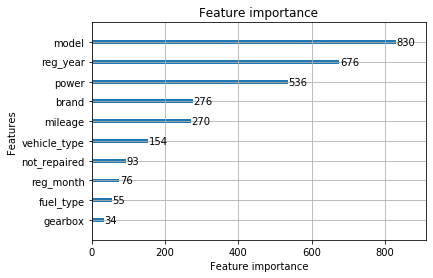

In [116]:
lgb.plot_importance(lgb_model)

For CatBoostRegressor, we excluded 'reg_month', 'fuel_type' and 'gearbox'. Let us try the same with LightGBM to see if there will be an improvement in performance. 

In [117]:
X_train_raw2 = X_train_raw.drop(['gearbox', 'reg_month', 'fuel_type'], axis=1)
X_test_raw2 = X_test_raw.drop(['gearbox', 'reg_month', 'fuel_type'], axis=1)

In [118]:
lgb_model2 = lgb.LGBMRegressor()
lgb_model2.fit(X_train_raw2, y_train_raw, eval_set=(X_test_raw2, y_test_raw), feature_name='auto', categorical_feature='auto', verbose=50)

[50]	valid_0's l2: 3.43617e+06
[100]	valid_0's l2: 3.2458e+06


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
y_pred = lgb_model2.predict(X_test_raw2)
print('RMSE:', np.sqrt(mean_squared_error(y_test_raw, y_pred)))

RMSE: 1801.610014248178


The performance got worse. We will go with the original set of features. 

In [120]:
lgb_model3 = lgb.LGBMRegressor()
lgb_model3.fit(X_train_naive, y_train_naive, eval_set=(X_test_naive, y_test_naive), feature_name='auto', categorical_feature='auto', verbose=50)

[50]	valid_0's l2: 2.93827e+06
[100]	valid_0's l2: 2.74823e+06


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [121]:
y_pred = lgb_model3.predict(X_test_naive)
print('RMSE:', np.sqrt(mean_squared_error(y_test_naive, y_pred)))

RMSE: 1657.7775450061129


* LightGBM also performs better on the training-test dataset-pair from which missing and illogical values have been removed, but again, this is a representation of a non-ideal situation. 


Do cross validation.

In [122]:
# specify your configurations as dictionaries
params = {'objective': ['regression'],
          'metric': ['rmse'],
          'boosting_type': ['gbdt'],
          'learning_rate': [0.05, 0.1, 0.3],
          'max_depth': [6, 8, 10],
          'num_leaves': [20, 30],
        }

start = time.time()
print("Starting the training at", start)

repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)

lgb_model2 = lgb.LGBMRegressor()
search_grid = RandomizedSearchCV(lgb_model2, param_distributions=params, verbose=50,  cv=repeated_split, random_state=12345)
search_grid.fit(X_train_raw2, y_train_raw)

end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636662762.0324445
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] objective=regression, num_leaves=30, metric=rmse, max_depth=10, learning_rate=0.1, boosting_type=gbdt 
[CV]  objective=regression, num_leaves=30, metric=rmse, max_depth=10, learning_rate=0.1, boosting_type=gbdt, score=0.845, total=   9.9s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s remaining:    0.0s
[CV] objective=regression, num_leaves=30, metric=rmse, max_depth=10, learning_rate=0.1, boosting_type=gbdt 
[CV]  objective=regression, num_leaves=30, metric=rmse, max_depth=10, learning_rate=0.1, boosting_type=gbdt, score=0.843, total=  10.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   19.9s remaining:    0.0s
[CV] objective=regression, num_leaves=30, metric=rmse, max_depth=10, learning_rate=0.1, boosting_type=gbdt 
[CV]  objective=regression, num_leaves=30, metric=rmse, 

In [123]:
# the best parameters
search_grid.best_params_

{'objective': 'regression',
 'num_leaves': 30,
 'metric': 'rmse',
 'max_depth': 8,
 'learning_rate': 0.3,
 'boosting_type': 'gbdt'}

In [124]:
# prediction
start = time.time()
print("Starting the prediction at", start)

y_pred = search_grid.predict(X_test_raw2)
print('RMSE:', np.sqrt(mean_squared_error(y_test_raw, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

RMSE: 1776.3483452671312
Ending the training at 1636663836.2412405
0.665795087814331 s


Text(0.5, 0, 'LightGBM Feature Importance')

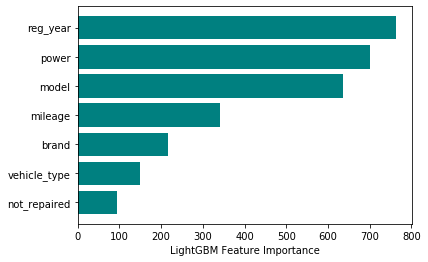

In [125]:
# feature importance
predictors = [x for x in X_train_raw2.columns]
lgb_feature_importance = pd.Series(search_grid.best_estimator_.feature_importances_, predictors).sort_values(ascending=True)
plt.barh(lgb_feature_importance.index, 
        lgb_feature_importance, 
        color='teal')
plt.xlabel("LightGBM Feature Importance")

* Algorithm: LightGBMRegressor model 
* Best RMSE score: 1775.61
* Hyperparameters: 'objective'='regression', 'num_leaves'=30, 'max_depth'=8, 'learning_rate'=0.3, 'boosting_type'='gbdt'
* Dataset: imputed with the most common value in all the missing values of all the features using SimpleImputer
* Features in the order of importance: 'reg_year', 'power', 'model', 'mileage', 'brand', 'vehicle_type', 'not_repaired'


The LightGBM regression algorithm is tree-based so it is robust to outliers and requires no data scaling. It has added advantages of being insensitive to missing values and being able to handle categorical "string" features as they are, where encoding is done under the hood. 

After the cross validation, the model changed its mind about the order of feature importance. 

Encode the datasets to be able to train more models that cannot handle categorical "string" variables.

**(F) Datasets encoded - express each category in the ratio of its occurrence to the total**

This is much faster than OHE and does not kill the kernel. 

In [18]:
# training dataset
vehicle_type_ratio_train = dict(X_train_imputed_out3['vehicle_type'].value_counts()/len(X_train_imputed_out3['vehicle_type']))
model_ratio_train = dict(X_train_imputed_out3['model'].value_counts()/len(X_train_imputed_out3['model']))
brand_ratio_train = dict(X_train_imputed_out3['brand'].value_counts()/len(X_train_imputed_out3['brand']))
not_repaired_ratio_train = dict(X_train_imputed_out3['not_repaired'].value_counts()/len(X_train_imputed_out3['not_repaired']))

# test dataset
vehicle_type_ratio_test = dict(X_test_imputed_out3['vehicle_type'].value_counts()/len(X_test_imputed_out3['vehicle_type']))
model_ratio_test = dict(X_test_imputed_out3['model'].value_counts()/len(X_test_imputed_out3['model']))
brand_ratio_test = dict(X_test_imputed_out3['brand'].value_counts()/len(X_test_imputed_out3['brand']))
not_repaired_ratio_test = dict(X_test_imputed_out3['not_repaired'].value_counts()/len(X_test_imputed_out3['not_repaired']))

In [19]:
# make a copy of X_train_imputed_out3
X_train_encoded = X_train_imputed_out3.copy()
X_test_encoded = X_test_imputed_out3.copy()

In [20]:
# replace the strings values with the corresponding numerical values in the dictionaries
X_train_encoded['vehicle_type'].replace(vehicle_type_ratio_train, inplace=True) 
X_train_encoded['model'].replace(model_ratio_train, inplace=True) 
X_train_encoded['brand'].replace(brand_ratio_train, inplace=True) 
X_train_encoded['not_repaired'].replace(not_repaired_ratio_train, inplace=True) 

# replace the strings values with the corresponding numerical values in the dictionaries
X_test_encoded['vehicle_type'].replace(vehicle_type_ratio_test, inplace=True) 
X_test_encoded['model'].replace(model_ratio_test, inplace=True) 
X_test_encoded['brand'].replace(brand_ratio_test, inplace=True) 
X_test_encoded['not_repaired'].replace(not_repaired_ratio_test, inplace=True) 

In [21]:
# transform features from 'object' data type to 'int' data type
for col in X_train_encoded.columns:
    col_type = X_train_encoded[col].dtype
    if col_type == 'object':
        X_train_encoded[col] = X_train_encoded[col].astype('int')
        
for col in X_test_encoded.columns:
    col_type = X_test_encoded[col].dtype
    if col_type == 'object':
        X_test_encoded[col] = X_test_encoded[col].astype('int')        

**(G) Datasets encoded - OHE and drop some columns**

OHE will inevitably increase the number of columns tremendously. In order to keep the number of columns manageable, let us take the top three features that the CatBoostRegressor model identified, two out of which the LightGBM model agrees.

In [41]:
# take 'reg_year', 'power' and 'brand' only
X_train_drop = X_train_imputed_out3.drop(['vehicle_type', 'model', 'mileage', 'not_repaired'], axis=1)
X_test_drop = X_test_imputed_out3.drop(['vehicle_type', 'model', 'mileage', 'not_repaired'], axis=1)
X_train_drop.shape # (283495, 3)
X_test_drop.shape # (70874, 3)

(70874, 3)

In [42]:
#encoder = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(X_train_drop)
X_train_ohe = encoder.transform(X_train_drop)
X_test_ohe = encoder.transform(X_test_drop)

In [43]:
X_train_ohe.shape # (283495, 684)
X_test_ohe.shape # (70874, 684)

(70874, 684)

The kernel usually dies at this point...

### Linear Regression

In [65]:
# (F) Datasets encoded - express each category in the ratio of its occurrence to the total
start = time.time()
print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', LinearRegression()) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
rmse_scores = cross_val_score(lr_pipe, X_train_encoded, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
rmse_scores = absolute(rmse_scores) # force the scores to be positive
print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

lr_pipe.fit(X_train_encoded, y_train_si_out)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636668610.4350274
RMSE scores after cv: 3515.682965323251
Ending the training at 1636668613.7339568
3.298929452896118 s


In [66]:
start = time.time()
print("Starting the prediction at", start)

y_pred = lr_pipe.predict(X_test_encoded)

print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1636668618.2409203
RMSE: 3521.383141930788
Ending the prediction at 1636668618.2508554
0.009935140609741211 s


The RMSE scores are not good.

Below is the code for training the linear regression model on the dataset (G). The kernel always dies on the Hub and the model cannot be run. But it runs locally, and below is the result, which is extremely bad. 


RMSE scores after cv: 169271235984831.06
<br>Ending the training at 1636660282.955328
<br>321.43455743789673 s

...and this is the score for prediction:
<br>RMSE: 1056087473429.916
<br>Ending the training at 1636660291.7403426
<br>0.7660956382751465 s

In [ ]:
# (G) Datasets encoded - OHE and drop some columns
#start = time.time()
#print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
#lr_pipe2 = Pipeline([
#    ('scaler', StandardScaler()), # feature scaling
#    ('model', LinearRegression()) # create an instance of the model
#])

# evaluate the model using cross validation and collect the scores
#repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
#rmse_scores = cross_val_score(lr_pipe2, X_train_ohe, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
#rmse_scores = absolute(rmse_scores) # force the scores to be positive
#print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

#lr_pipe2.fit(X_train_ohe, y_train_si_out)
#end = time.time()
#print("Ending the training at", end)
#print(end - start, 's')

In [ ]:
#start = time.time()
#print("Starting the prediction at", start)

#y_pred = lr_pipe2.predict(X_test_ohe)

#print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

#end = time.time()
#print("Ending the prediction at", end)
#print(end - start, 's')

### Decision Tree

In [46]:
# (F) Datasets encoded - express each category in the ratio of its occurrence to the total
start = time.time()
print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
dt_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', DecisionTreeRegressor()) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
rmse_scores = cross_val_score(dt_pipe, X_train_encoded, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
rmse_scores = absolute(rmse_scores) # force the scores to be positive
print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

dt_pipe.fit(X_train_encoded, y_train_si_out)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636665695.00147
RMSE scores after cv: 2130.798272272877
Ending the training at 1636665710.474699
15.473228931427002 s


In [47]:
start = time.time()
print("Starting the prediction at", start)

y_pred = dt_pipe.predict(X_test_encoded)

print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1636665722.008078
RMSE: 2195.0672054932343
Ending the prediction at 1636665722.0971415
0.08906340599060059 s


Better than the decision tree but still bad RMSE scores. 

Below is the code for training the linear regression model on the dataset (G). The kernel always dies on the Hub and the model cannot be run. But it runs locally, and below is the result, which is extremely bad. 


RMSE scores after cv: 169271235984831.06
<br>Ending the training at 1636660650.291602
<br>322.6664836406708 s

...and this is the score for prediction:
<br>RMSE: 342455650404.74866
<br>Ending the training at 1636658069.0043154
<br>0.949908971786499 s

In [1]:
# (G) Datasets encoded - OHE and drop 'model'
#start = time.time()
#print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
#lr_pipe2 = Pipeline([
#    ('scaler', StandardScaler()), # feature scaling
#    ('model', LinearRegression()) # create an instance of the model
#])

# evaluate the model using cross validation and collect the scores
#repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
#rmse_scores = cross_val_score(lr_pipe2, X_train_ohe, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
#rmse_scores = absolute(rmse_scores) # force the scores to be positive
#print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

#lr_pipe2.fit(X_train_ohe, y_train_si_out)
#end = time.time()
#print("Ending the training at", end)
#print(end - start, 's')

NameError: name 'time' is not defined

In [ ]:
#start = time.time()
#print("Starting the prediction at", start)

#y_pred = lr_pipe2.predict(X_test_ohe)

#print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

#end = time.time()
#print("Ending the prediction at", end)
#print(end - start, 's')

### Random Forest

In [48]:
# (F) Datasets encoded - express each category in the ratio of its occurrence to the total
start = time.time()
print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
rf_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', RandomForestRegressor(n_estimators=50, random_state=12345)) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
rmse_scores = cross_val_score(rf_pipe, X_train_encoded, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
rmse_scores = absolute(rmse_scores) # force the scores to be positive
print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

rf_pipe.fit(X_train_encoded, y_train_si_out)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636665838.4007227
RMSE scores after cv: 1799.4007556610406
Ending the training at 1636666219.3384259
380.9377031326294 s


In [49]:
start = time.time()
print("Starting the prediction at", start)

y_pred = rf_pipe.predict(X_test_encoded)

print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1636666392.889529
RMSE: 1811.4433547548158
Ending the prediction at 1636666395.1285279
2.2389988899230957 s


Better than the linear regression and the decision tree models. 

Below is the code for training the linear regression model on the dataset (G). The kernel always dies on the Hub and the model cannot be run. But it runs locally, and below is the result, which is extremely bad. 


RMSE scores after cv: 99726390388251.31
<br>Ending the training at 1636659098.4799576
<br>357.20299887657166 s

...and this is the score for prediction:
<br>RMSE: 342455650404.74866
<br>Ending the training at 1636659119.4596202
<br>1.0768775939941406 s

In [ ]:
# (G) Datasets encoded - OHE and drop 'model'
#start = time.time()
#print("Starting the training at", start)

# create a pipeline to perform feature scaling at the correct timing during cross evaluation
#rf_pipe2 = Pipeline([
#    ('scaler', StandardScaler()), # feature scaling
#    ('model', LinearRegression()) # create an instance of the model
#])

# evaluate the model using cross validation and collect the scores
#repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)
#rmse_scores = cross_val_score(rf_pipe2, X_train_ohe, y_train_si_out, cv=repeated_split, scoring='neg_mean_squared_error')
#rmse_scores = absolute(rmse_scores) # force the scores to be positive
#print('RMSE scores after cv:', np.sqrt(np.nanmean(rmse_scores)))

#rf_pipe2.fit(X_train_ohe, y_train_si_out)
#end = time.time()
#print("Ending the training at", end)
#print(end - start, 's')

In [ ]:
#start = time.time()
#print("Starting the prediction at", start)

#y_pred = rf_pipe2.predict(X_test_ohe)

#print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

#end = time.time()
#print("Ending the prediction at", end)
#print(end - start, 's')

### XGBoostRegressor

* No need for the data to be scaled.
* Can handle missing values. 
* Categorical "string" variables need to be encoded.


We have a catch 22 here. The model can handle missing values but not categorical "string" values. One Hot Encoding can convert categorical variables from string to numeral but cannot handle NaNs. We want to see that XGBoost can handle missing values, but we cannot. 

So we will settle for using datasets (F) since they are encoded although they are already imputed and no longer contain missing values.  

In [22]:
# an initial run on datasets (F)
start = time.time()
print("Starting the training at", start)

xgb_model = xgb.XGBRegressor(
    verbosity=1,
    max_depth=3, 
    learning_rate=0.3, 
    # n_estimators=100, # default
    random_state=12345,
    objective='reg:squarederror', # 'reg:gamma',
    booster='gbtree',
    eval_metric='rmse'
)

xgb_model.fit(X_train_encoded, y_train_si_out)
end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636693655.0670118
Ending the training at 1636693672.1636772
17.096665382385254 s


In [23]:
start = time.time()
print("Starting the prediction at", start)

y_pred = xgb_model.predict(X_test_encoded)

print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1636693692.2193203
RMSE: 2029.3987395437218
Ending the prediction at 1636693692.5178964
0.29857611656188965 s


Not a very impressive RMSE score.


Adjust the influence of the features according to the importance weights. 

Text(0.5, 0, 'XGBoost Feature Importance')

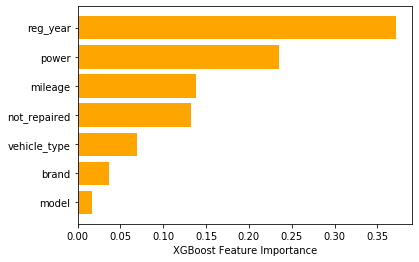

In [29]:
# feature importance
predictors = [x for x in X_train_encoded.columns]
xgb_feature_importance = pd.Series(xgb_model.feature_importances_, predictors).sort_values(ascending=True)
plt.barh(xgb_feature_importance.index, 
        xgb_feature_importance, 
        color='orange')
plt.xlabel("XGBoost Feature Importance")

In [30]:
# select features based on importance weights
# fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train_encoded)

    # fit the model
    selected_model = xgb.XGBRegressor()
    selected_model.fit(select_X_train, y_train_si_out)

    # evaluate the model
    select_X_test = selection.transform(X_test_encoded)
    y_pred = selected_model.predict(select_X_test)

[23:13:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:14:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:15:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:15:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [31]:
print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

RMSE: 3155.0609757274947


The score got worse when their influence was adjusted according to the importance weights. Let us try fine-tuning the hyperparameters. 

In [24]:
# specify your configurations as dictionaries
params = {'objective': ['reg:squarederror'],
          'eval_metric': ['rmse'],
          #'booster': ['gbtree'], # default value
          'max_depth': [6, 10], 
          'eta':[0.1, 0.3] # deafault = 0.3 (equivalent to learning rate)
        }

start = time.time()
print("Starting the training at", start)

repeated_split = RepeatedKFold(n_splits=5, n_repeats=2, random_state=12345)

xgb_model2 = xgb.XGBRegressor()
search_grid = RandomizedSearchCV(xgb_model2, param_distributions=params, verbose=50, cv=repeated_split, random_state=12345)
search_grid.fit(X_train_encoded, y_train_si_out)

end = time.time()
print("Ending the training at", end)
print(end - start, 's')

Starting the training at 1636694649.532121
Fitting 10 folds for each of 4 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1 
[CV]  objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1, score=0.831, total=  25.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   25.7s remaining:    0.0s
[CV] objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1 
[CV]  objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1, score=0.828, total=  25.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   51.2s remaining:    0.0s
[CV] objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1 
[CV]  objective=reg:squarederror, max_depth=6, eval_metric=rmse, eta=0.1, score=0.824, total=  25.7s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.3min remaining:    0.0s
[CV] objective=reg:squarederror, max_depth=6, eval_me

In [25]:
# predict
start = time.time()
print("Starting the prediction at", start)

y_pred = xgb_model.predict(X_test_encoded)

print('RMSE:', np.sqrt(mean_squared_error(y_test_si_out, y_pred)))

end = time.time()
print("Ending the prediction at", end)
print(end - start, 's')

Starting the prediction at 1636697107.2331014
RMSE: 2029.3987395437218
Ending the prediction at 1636697107.531672
0.2985706329345703 s


The result is still not as good as CatBoostRegressor or LightGBM.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The modeling section is great! You tried several different models, tuned their hyperparameters with a cross-validated randomized search, and even tried various several preprocessing procedures! Very thorough! The models were trained and evaluated correctly, and you measured their runtimes.
	  
</div>

## Model Analysis

Note: the measurements may differ between the Hub and a local environment, and between training sessions.


**Speed**
* Training 
<br>o LightGBM (13.2 min)
<br>o CatBoostRegressor (41.4 min)
<br>o Linear Regression (0.055 min)
<br>o Decision Tree (15.47 s)
<br>o Random Forest (380.94 s)
<br>o XGBoostRegressor (24.4 min)

* Prediction
<br>o LightGBM (0.46 s)
<br>o CatBoostRegressor (0.99 s)
<br>o Linear Regression (0.0099 s)
<br>o Decision Tree (0.089 s)
<br>o Random Forest (2.24 s)
<br>o XGBoostRegressor (0.30 s)


**Performance**
* Best RMSE score
<br>o LightGBM (1775.61 EUR)
<br>o CatBoostRegressor (1737.80 EUR)
<br>o Linear Regression (3521.38 EUR)
<br>o Decision Tree (2195.07 EUR)
<br>o Random Forest (1811.44 EUR)
<br>o XGBoostRegressor (2029.40 EUR)

* Order of feature importance:
<br>o LightGBM: 'reg_year', 'power', 'model'
<br>o CatBoostRegressor: 'reg_year', 'power', 'brand'
<br>o XGBoostRegressor: 'reg_year', 'power', 'mileage'


**Ease of dataset preparation**
<br>CatBoostRegressor was by far the most convenient, followed by LightGBM, which seemed more stable in terms of its set-up and execution. 


**A word on the choice of models**
<br>The EDA revealed some deciding factors that influence the choice of models:
<br>o non-negligible proportions of missing values -> what if we did not have to deal with them?
<br>o more than half of the features are categorical “string” variables -> can we handle them as they are?
<br>o ‘model’ feature alone has 250 categories -> want to avoid encoding

The project instruction required that we test XGBoostRegressor, Linear Regression, Decision Tree and Random Forest as well, but given the nature of the data, they would not have been my choice. 

Note: I wanted to try H2O Random Forest and H2O GBM as well. Either my PC being too weak or due to some incompatibility that I have yet to figure out, my jupyter notebook got stuck at the initial H2O demo stage for installation verification, and these models regrettably did not materialise in this project. 



**A word on feature engineering**
<br>The project evolved through an iterative process. After the candidate models were chosen, it was clear that data preparation was critical more than ever. With each trial run of the models came a new idea for feature engineering: the data would be transformed then the models would be run on them, and so forth. Hence the five pairs of training-test datasets. 

* Missing values in the categorical variables: unlike LightGBM, CatBoostRegressor is incapable of coping with missing values in categorical variables while it is fine with missing values in numerical values, and XGBoostRegressor more so.
* Illogical values (outliers): registration years outside the history of automobile industry; super-futuristic as well as worse-than-a-clunker horsepower figures
* Variables that are not informative in predicting the value of a car: 'DateCrawled' , 'DateCreated' , 'NumberOfPictures' , 'LastSeen' were dropped from the word get go, just by reading their description in the Project Instruction.
<br>Note: 'PostalCode' was considered at first for its potential value in carrying information about car availability in each geographical area, e.g. if a particular ‘model’ is superfluous in an area, the car maybe worth less than in other areas where the ‘model’ is scarce. But upon running the models and seeing it had no added value, it was dropped in favour of model simplicity. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Conclusions look great! 
    
> Note: 'PostalCode' was considered at first for its potential value in carrying information about car availability in each geographical area, e.g. if a particular ‘model’ is superfluous in an area, the car maybe worth less than in other areas where the ‘model’ is scarce. But upon running the models and seeing it had no added value, it was dropped in favour of model simplicity.
    
That's a very good way to perform feature selection! Test it with a model!
	  
</div>

<div class="alert alert-info" role="alert">
<b>Questions on missing values and imputation</b>

* The models performed the best on the training-test dataset-pair from which the missing and illogical values were simply removed. A lot of publications recommend simply to delete these "inconveniences". But real-world data are full of them, so a model ought to be equipped to handle imperfect data. When receiving a single row of data, dismissing it will not be an option. 
<br>Q. What is your take on deleting missing and illogical values from both the training and test datasets?

    
* There is more logic in trying to figure out the most frequent ‘model’ from each ‘reg_year’ and ‘brand’ pair than in taking “the most frequent value along each column“ (...sklearn.impute.SimpleImputer.html). But SimpleImputer performed better. (scikit-learn’s CategoricalImputer refused to be installedon my PC...)
<br>Q. Do nonsensical means justify the ends as long as you get good results?
    
    
* Even after reducing the number of features to three with fairly low cardinality, encoding expanded the dataset to 707 columns and the hub's kernel could not cope. Encoding 250 categories in ‘model’ would have been even more disastrous, and none of the columns would have been up for removal in feature selection since they are all part of a single feature. 
<br>Q. What if it was a variable with high feature importance and could not be dropped? Is the frequency ratio tactic I used the go-to method?
  
    
* I get disconnected from the hub or the kernel dies very frequently or things that run locally very nicely do not run on the hub. When that happens, I lose everything and have to start all over again. That has always been the problem, but now that I have to run grid search and cross validation and actions that take a long time, it is even more pronounced. 
<br>Q. Do you have any tips for me on how to work more efficiently? 
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
1. There's no general best way to do it. It depends on whether your model will have to frequently deal with missing values or not, and so on. I'd say it's more an engineering/data collection problem. If your website allows people to claim their car has 1 billion horsepower, it seems that this problem has to be solved by the engineers maintaining the site (e.g. make limits on what values can be entered), rather than by machine learning engineers preparing the model to work on all possible data.
    
2. If it works, why not, I guess? But really, the one thing that machine learning models depends greatly on is the quality of the data. If the data is garbage, the model will be garbage. And in this project, there's enough data to just drop the missing values (and I think that's what got you the best results).
    
3. Well, you can try ordinal encoding, which should be good enough for tree-based models. With one-hot encoding, there's not much you can do about high-cardinality categorical features.
    
4. It's probably because you're using a lot of memory by having 5 different versions of the dataset and training a lot of big models (just think about training 100 models with 1000 trees for example, it takes quite a bit of memory as well as time). Another point is why use repeated k-fold over regular k-fold? For the learning purposes, regular k-fold validation seems more than enough, and by using repeated k-fold we're doubling the time required for training the models for no good reason.
	  
    
</div>

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed